<a href="https://colab.research.google.com/github/MsaydurrahmanSami/An-Analysis-of-Character-Representation-from-Print-Book-vs-Visual-Movie-Media/blob/master/face_recognition_frame_by_frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install face_recognition


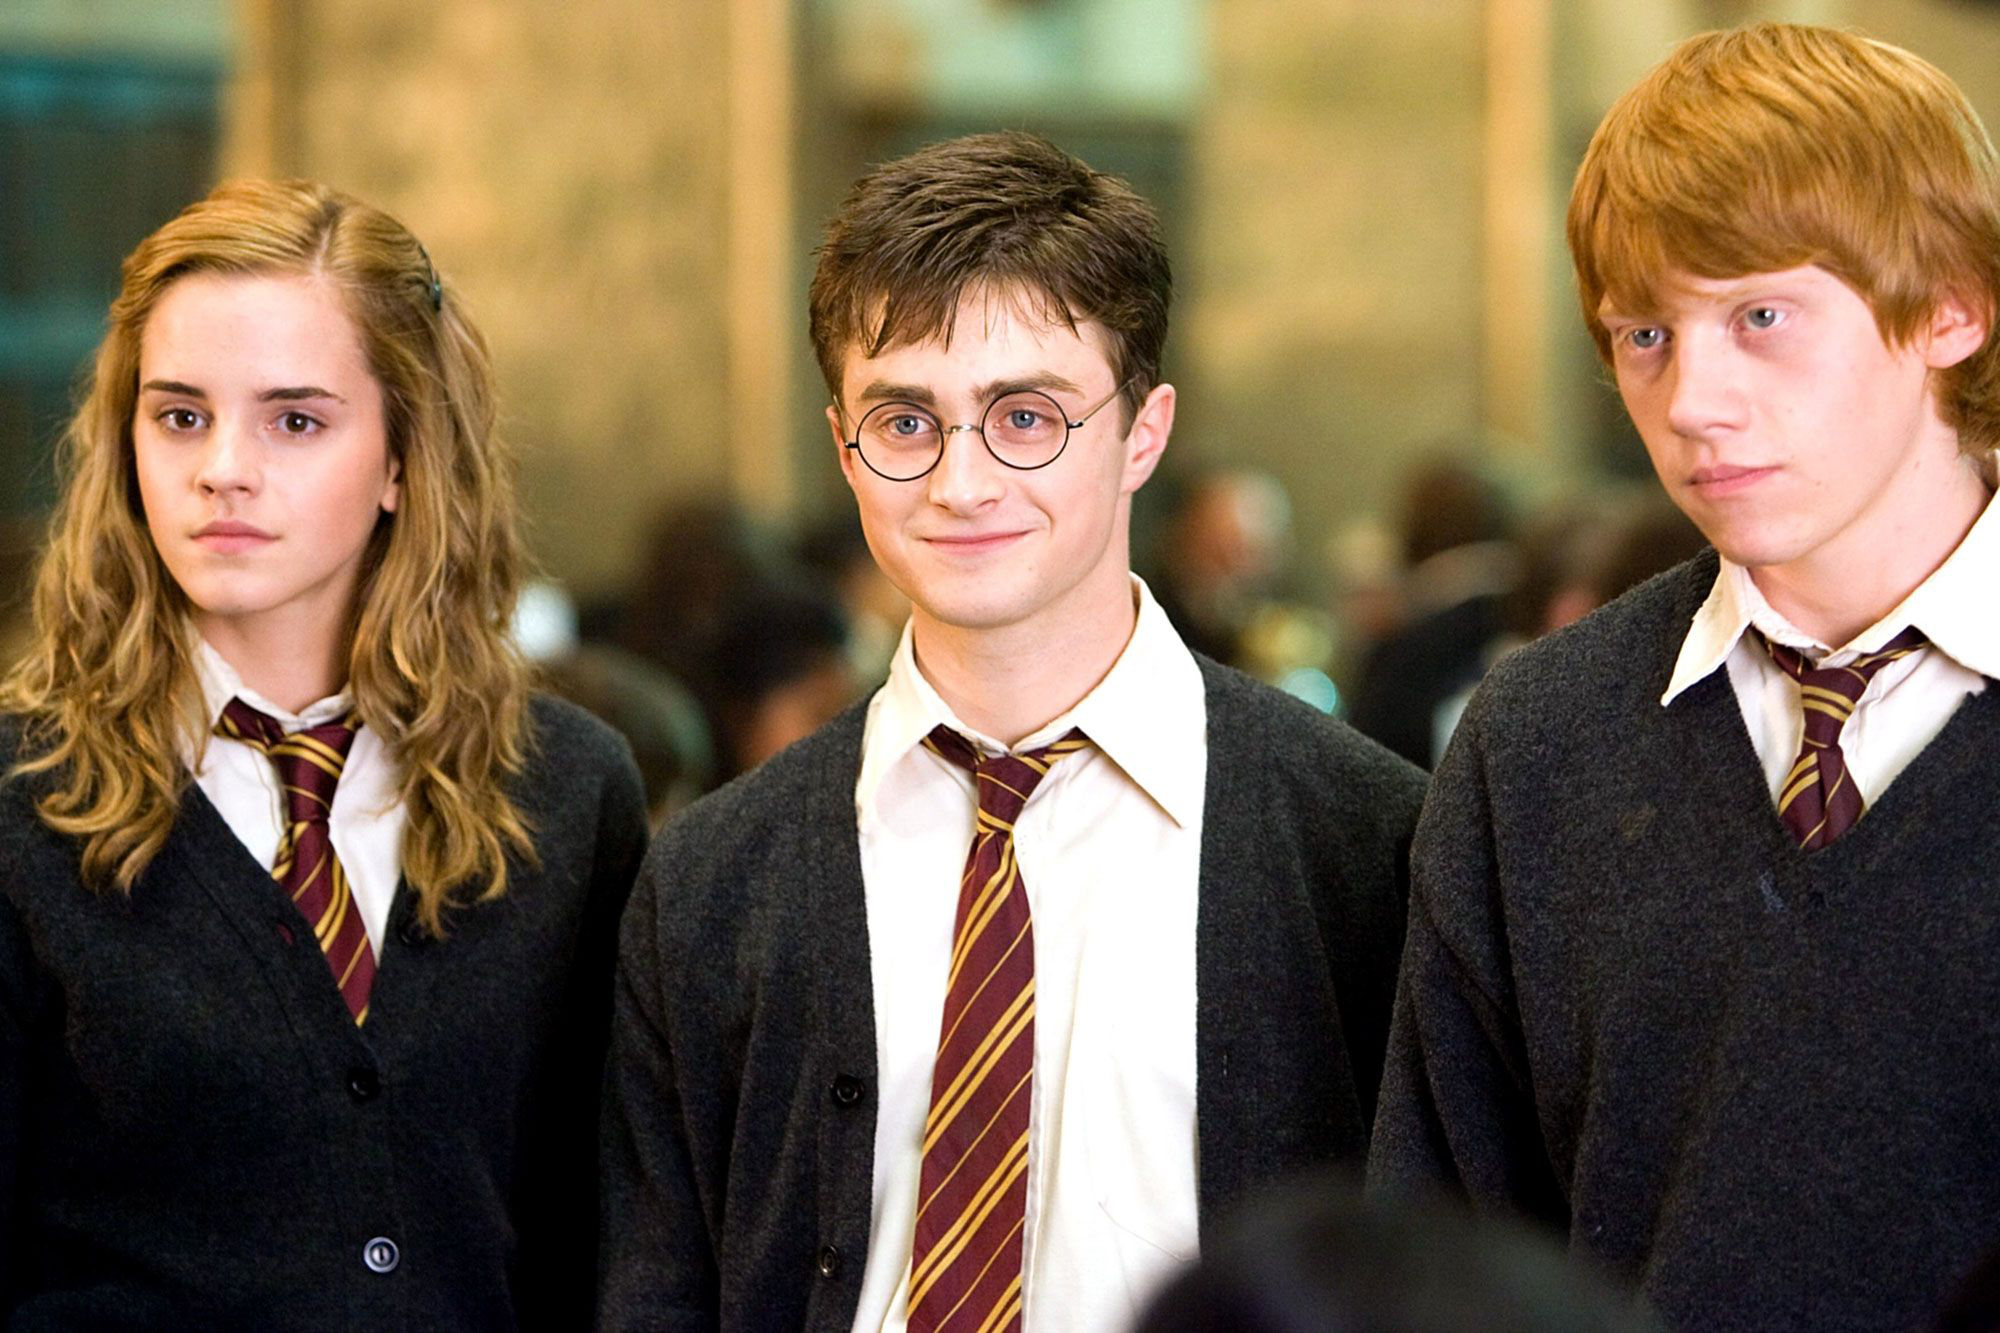

In [ ]:
from PIL import Image, ImageDraw
from IPython.display import display

# The program we will be finding faces on the example below
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/threepeople.jpg')
display(pil_im)

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display

# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
hermonie_image = face_recognition.load_image_file("/content/drive/My Drive/Colab Notebooks/HR.jpg")
hermonie_face_encoding = face_recognition.face_encodings(hermonie_image)[0]

# Load a second sample picture and learn how to recognize it.
harry_image = face_recognition.load_image_file("/content/drive/My Drive/Colab Notebooks/DR.jpeg")
harry_face_encoding = face_recognition.face_encodings(harry_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    hermonie_face_encoding,
    harry_face_encoding
]
known_face_names = [
    "Hermione Granger",
    "Harry Potter"
]
print('Learned encoding for', len(known_face_encodings), 'images.')

Learned encoding for 2 images.
